['Datasets/CLA-SubjectJ-170504-3St-LRHand-Inter', 'Datasets/CLA-SubjectJ-170504-3St-LRHand-Inter', 'Datasets/CLA-SubjectJ-170508-3St-LRHand-Inter', 'Datasets/CLA-SubjectJ-170508-3St-LRHand-Inter', 'Datasets/CLA-SubjectJ-170510-3St-LRHand-Inter', 'Datasets/CLA-SubjectJ-170510-3St-LRHand-Inter']
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
Datasets/CLA-SubjectJ-170504-3St-LRHand-Inter


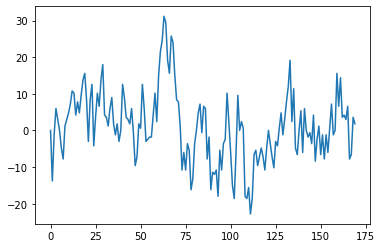

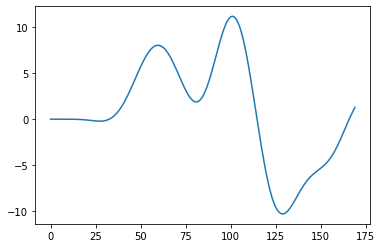

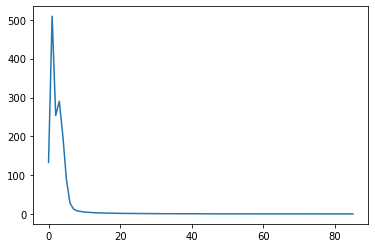

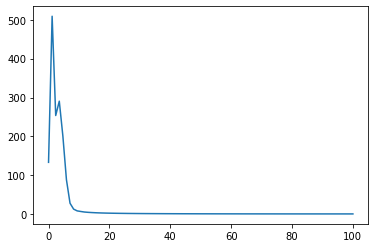

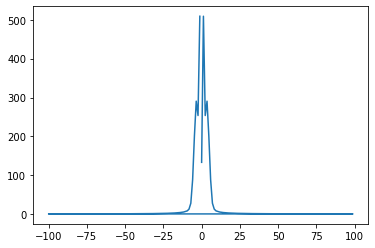

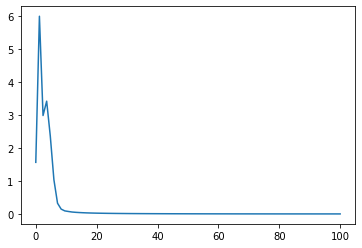

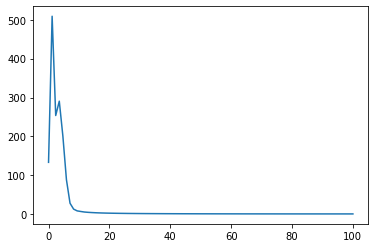

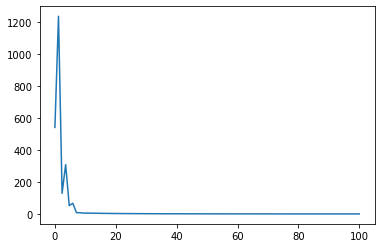

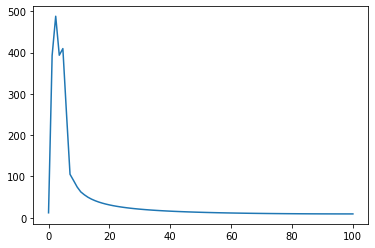

(289, 189)
(327, 189)
(284, 189)
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
Datasets/CLA-SubjectJ-170504-3St-LRHand-Inter


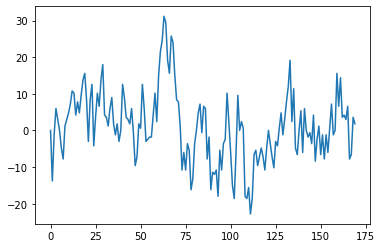

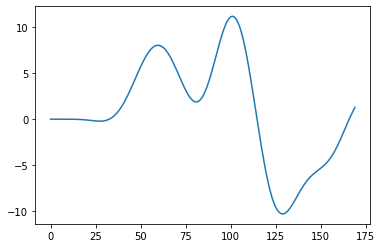

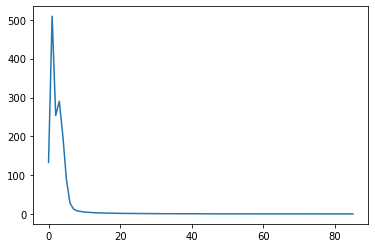

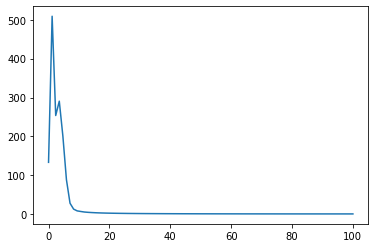

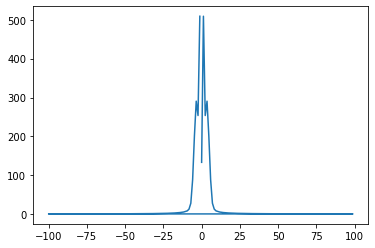

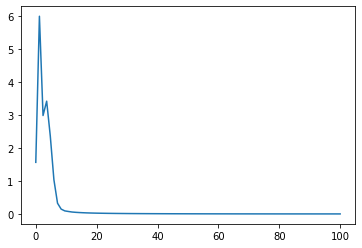

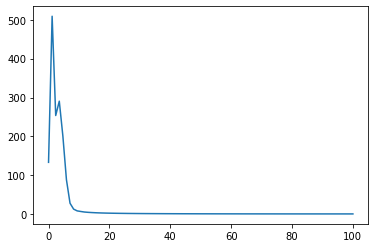

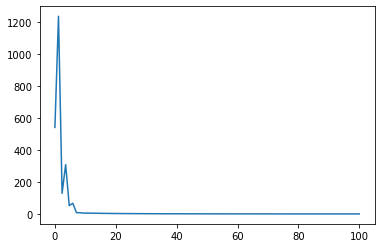

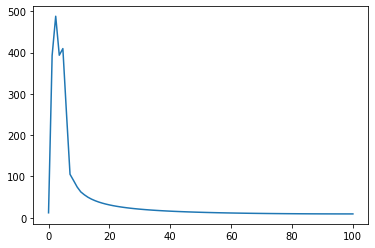

(289, 189)
(327, 189)
(284, 189)
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
Datasets/CLA-SubjectJ-170508-3St-LRHand-Inter


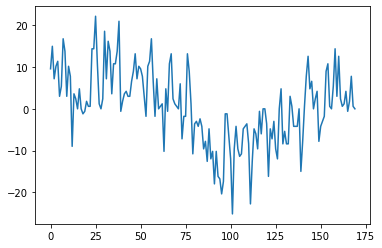

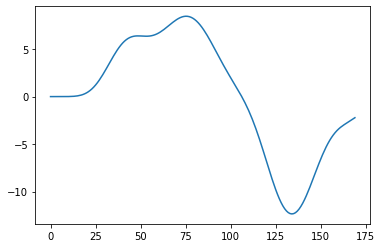

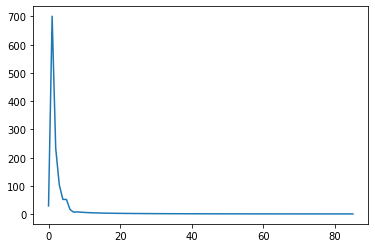

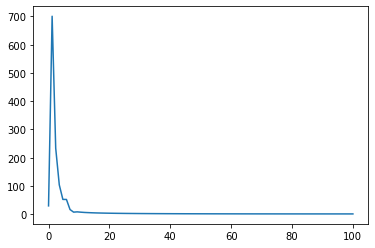

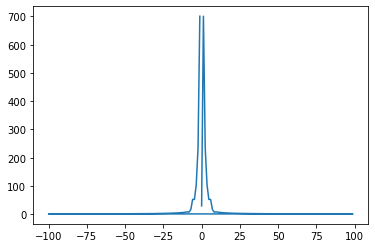

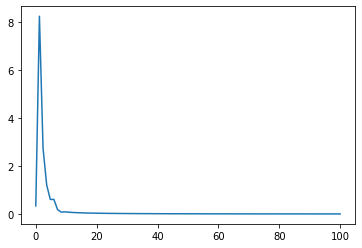

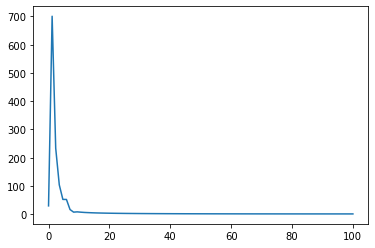

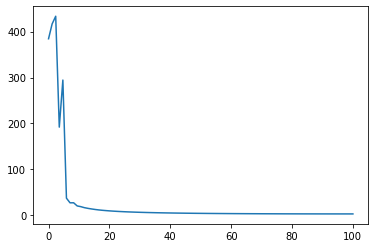

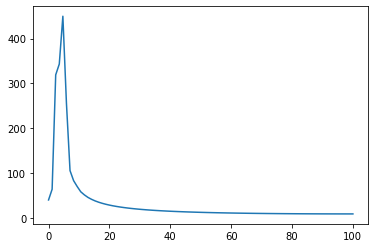

(289, 189)
(327, 189)
(284, 189)
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
Datasets/CLA-SubjectJ-170508-3St-LRHand-Inter


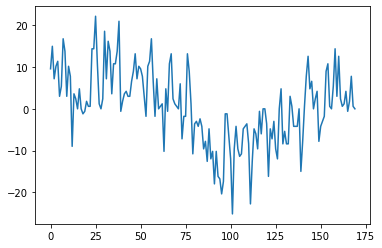

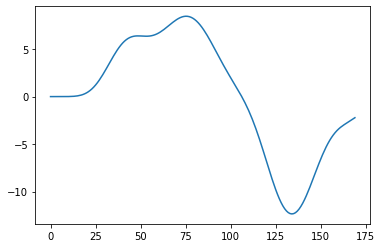

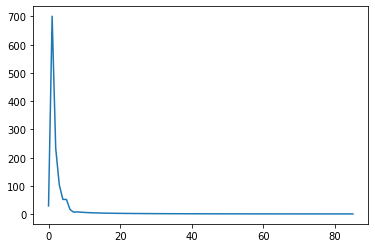

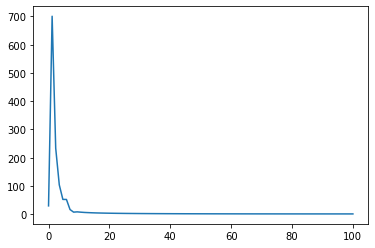

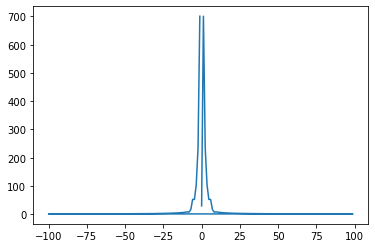

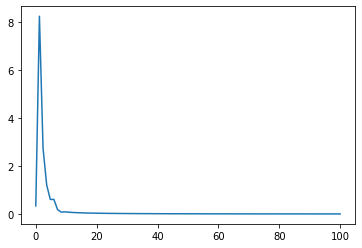

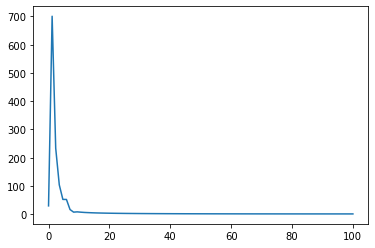

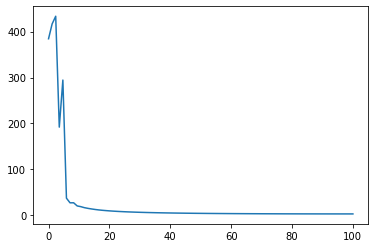

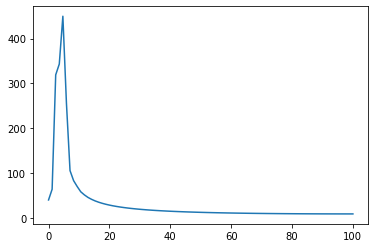

(289, 189)
(327, 189)
(284, 189)
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
Datasets/CLA-SubjectJ-170510-3St-LRHand-Inter


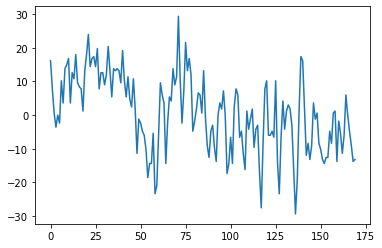

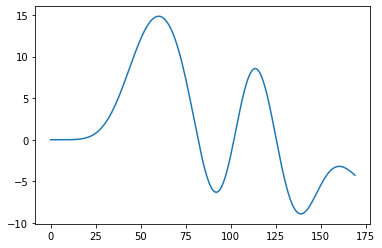

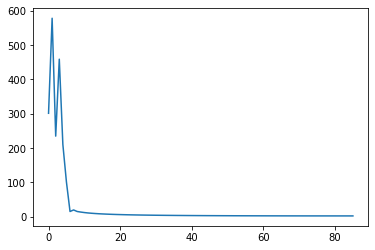

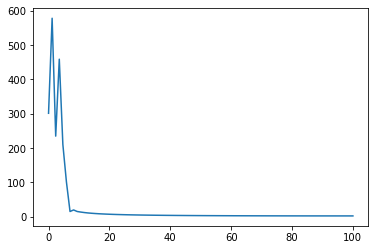

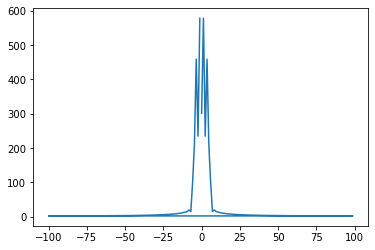

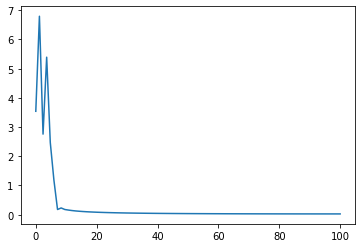

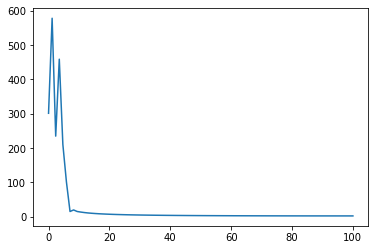

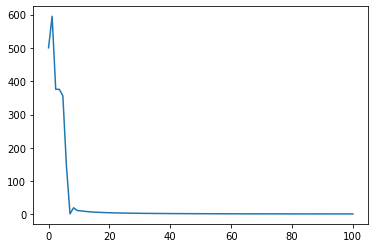

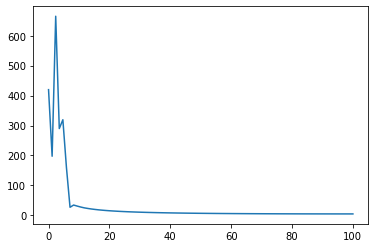

(289, 189)
(327, 189)
(284, 189)
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
Datasets/CLA-SubjectJ-170510-3St-LRHand-Inter


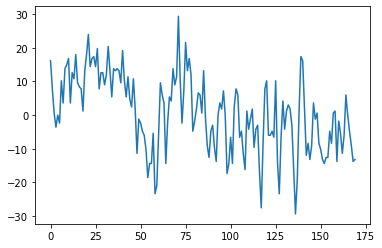

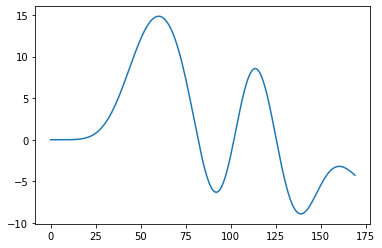

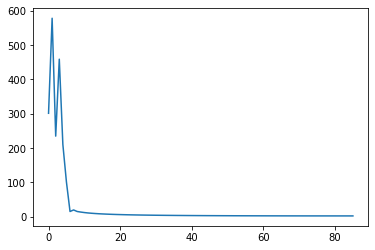

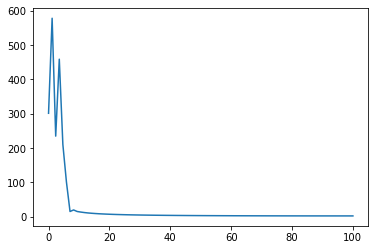

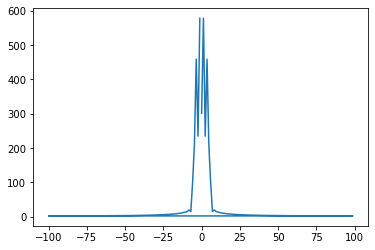

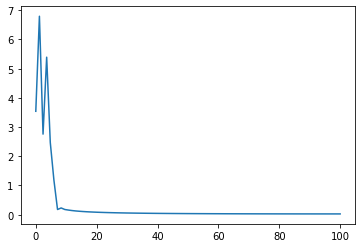

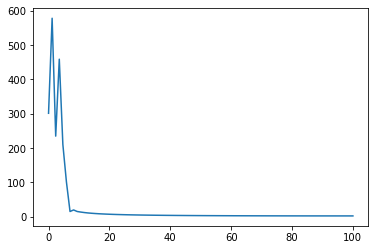

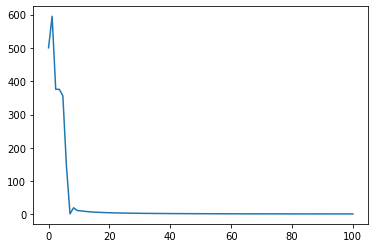

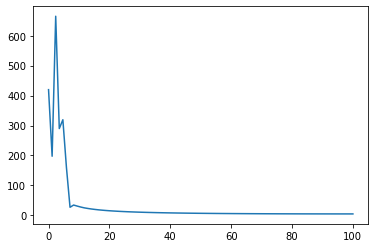

(289, 189)
(327, 189)
(284, 189)


In [1]:
import Pre_processing
from Pre_processing import file_names
import numpy as np
import scipy.io
import pandas as pd
from scipy import fft
from scipy import signal
import matplotlib.pyplot as plt

print(file_names)

for file in file_names:
    mat = Pre_processing.take_input(file+'.mat')
    print(mat['o'][0][0].dtype)
    markers = Pre_processing.get_markers(mat)
    data = Pre_processing.get_data(mat)
    frame_of_1 = Pre_processing.get_trial_frames(data, markers, 1)
    frame_of_2 = Pre_processing.get_trial_frames(data, markers, 2)
    frame_of_3 = Pre_processing.get_trial_frames(data, markers, 3)
    print(file)
    plt.plot(np.arange(170), frame_of_1[0][0])
    plt.show()
    low_pass_filter = Pre_processing.design_filter(8, 200, 5)
    f_signal_1 = Pre_processing.apply_filter(low_pass_filter, frame_of_1)
    f_signal_2 = Pre_processing.apply_filter(low_pass_filter, frame_of_2)
    f_signal_3 = Pre_processing.apply_filter(low_pass_filter, frame_of_3)
    plt.plot(np.arange(170), f_signal_1[0][0])
    plt.show()
    transformed_frame_of_1 = Pre_processing.fourier_trans(f_signal_1)
    transformed_frame_of_2 = Pre_processing.fourier_trans(f_signal_2)
    transformed_frame_of_3 = Pre_processing.fourier_trans(f_signal_3)
    plt.plot(abs(transformed_frame_of_1[0][0]))
    plt.show()
    yf = transformed_frame_of_1[0][0]
    v = np.arange(86)
    t = 170 / 200.0
    xf = v / t

    fig, ax = plt.subplots()
    ax.plot(xf, abs(yf))
    plt.show()
    yf = fft.fft(f_signal_1, axis=2)
    yf = yf[0][0]
    xf = fft.fftfreq(170, 1 / 200.0)
    fig, ax = plt.subplots()
    ax.plot(xf, np.abs(yf))
    plt.show()

    yf = fft.fft(f_signal_1, axis=2)
    yf = yf[0][0]
    xf = np.linspace(0.0, 1.0 / (2.0 * (1.0 / 200.0)), 85)

    fig, ax = plt.subplots()
    ax.plot(xf, (2.0 / 170) * np.abs(yf[0:85]))
    plt.show()

    transformed_frame_of_1 = Pre_processing.remove_phase_shift(transformed_frame_of_1)
    transformed_frame_of_2 = Pre_processing.remove_phase_shift(transformed_frame_of_2)
    transformed_frame_of_3 = Pre_processing.remove_phase_shift(transformed_frame_of_3)

    yf = transformed_frame_of_1[0][0]
    xf = fft.rfftfreq(170, 1 / 200.0)
    fig, ax = plt.subplots()
    ax.plot(xf, np.abs(yf))
    plt.show()

    yf = transformed_frame_of_2[0][0]
    xf = fft.rfftfreq(170, 1 / 200.0)
    fig, ax = plt.subplots()
    ax.plot(xf, np.abs(yf))
    plt.show()

    yf = transformed_frame_of_3[0][0]
    xf = fft.rfftfreq(170, 1 / 200.0)
    fig, ax = plt.subplots()
    ax.plot(xf, np.abs(yf))
    plt.show()

    all_trials_of_1 = Pre_processing.extract_features(transformed_frame_of_1)
    all_trials_of_2 = Pre_processing.extract_features(transformed_frame_of_2)
    all_trials_of_3 = Pre_processing.extract_features(transformed_frame_of_3)

    print(all_trials_of_1.shape)
    print(all_trials_of_2.shape)
    print(all_trials_of_3.shape)

    trials_sets = [all_trials_of_1, all_trials_of_2, all_trials_of_3]
    class_labels = [1, 2, 3]
    dataset = Pre_processing.create_dataset(trials_sets, class_labels)

    dataset.to_csv(file+'.csv')